<hr>
<h1 style="text-align: center;">Project Title</h1>
<hr>

<h3 style="text-align: center;">Your Name Here</h3>
<h3 style="text-align: center;">Student ID: 123456789</h3>
<h3 style="text-align: center;">Project #: 1</h3>
<h3 style="text-align: center;">Date: </h3>

<h3 style="text-align: center;">EAE 127: Applied Aerodynamics</h3>
<h3 style="text-align: center;">University of California, Davis</h3>

<hr>


<hr>

# **Local Software Environment Setup Acknowledgment**

I, [NAME], acknowledge that I have downloaded and successfully setup Python, Anaconda, and my desired IDE on my working machine for this course prior to the submission of this assignment. 

[TODAY'S DATE]


<hr>

# Project 0 - Introduction to Aerodynamics and Python


This is an introductory exercise for gaining familiarity with Python and Aerodyamics concepts that will be explored in later projects. **When using this solution, try to follow these guidelines**:
- Attempt the problem yourself individually, and try to break the problem into steps.
- Try to rephrase the problem into non-coding terms (i.e when asked to plot something, you'll need to have some data for the x-axis as well as the y-axis)
- Solve one step at a time, make an attempt at recreating the code on your own using the examples on canvas
- If you get stuck, or aren't sure of the exact syntax, you should read the online documentation, or reference this solution.

**Some things you should try to avoid when using this solution:**
- Breezing through problems without trying them on your own.
- Copying the coding solutions verbatim/without understanding how to implement them.
- Waiting until the last minute to work on your code.

As a reminder, this is the only project where the full solution will be provided ahead of time. You won't lose points if your code or solution matches closely to the code you find below, but on future projects you will be given less and less of the correct code and expected to implement solutions on your own. It's best to use this document to guide your learning of the coding and syntax in python.

Lets get started with some plotting imports (you can copy this part verbatim, as its just setting plotting presets).

In [111]:
#STANDARD IMPORTS
import numpy as np
import os
import matplotlib.pyplot as plt
### JUPYTER NOTEBOOK SETTINGS ########################################
#Plot all figures in full-size cells, no scroll bars
%matplotlib inline
#Disable Python Warning Output
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')
### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package
#No Background fill, legend font scale, frame on legend
sns.set(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)

#Get color cycle for manual colors
colors = sns.color_palette()
#SET MATPLOTLIB DEFAULTS
#(call after seaborn, which changes some defaults)
params = {
#FONT SIZES
'axes.labelsize' : 30, #Axis Labels
'axes.titlesize' : 30, #Title
'font.size' : 28, #Textbox
'xtick.labelsize': 22, #Axis tick labels
'ytick.labelsize': 22, #Axis tick labels
'legend.fontsize': 24, #Legend font size
'font.family' : 'serif',
'font.fantasy' : 'xkcd',
'font.sans-serif': 'Helvetica',
'font.monospace' : 'Courier',
#AXIS PROPERTIES
'axes.titlepad' : 2*6.0, #title spacing from axis
'axes.grid' : True, #grid on plot
'figure.figsize' : (8,8), #square plots
'savefig.bbox' : 'tight', #reduce whitespace in saved figures
#LEGEND PROPERTIES
'legend.framealpha' : 0.5,
'legend.fancybox' : True,
'legend.frameon' : True,
'legend.numpoints' : 1,
'legend.scatterpoints' : 1,
'legend.borderpad' : 0.1,
'legend.borderaxespad' : 0.1,
'legend.handletextpad' : 0.2,
'legend.handlelength' : 1.0,
'legend.labelspacing' : 0,
}
import matplotlib
matplotlib.rcParams.update(params) #update matplotlib defaults, call after￿
### END OF BOILERPLATE ##################################################
colors = sns.color_palette() #color cycle




### Problem 1 - Boundary Layer Parameters

1.1 Turbulent Boundary Layers and Numeric Integration

For the first portion of this problem, we will calculate and plot the horizontal velocity distribution
in the vertical direction of a laminar and turbulent boundary layer at the aftmost location on a Boeing 747 at
cruise. The purpose of this exercise is to illustrate concepts pertaining to boundary layers while
developing python skills in creating and manipulating data.

We will use the provided reference parameters for the length of the fuselage L (location where
we are examining the boundary layer) and flow Reynolds Number Re



In [112]:
L = 300     #fuselage length [ft]
Re = 1e8    #Reynolds Number (turbulent flow)

An approximation of the laminar and turbulent boundary layer x-velocty distribution between the wall and the boudary layer edge can be written as:

**Laminar Boundary Layer Velocity Profile** 

$$ \frac{u}{u_e} \approx \left[ 2 \left( \frac{y}{\delta} \right) - \left( \frac{y}{\delta} \right)^2 \right] $$

**Turbulent Boundary Layer Velocity Profile** 

$$ \frac{u}{u_e} \approx \left( \frac{y}{\delta} \right)^{\dfrac{1}{7}} $$

where $\frac{y}{\delta}$ is the vertical coordinate in the boundary layer at some x-location non-dimensionalized by the physical boundary layer thickness at that x-location and $\frac{u}{u_{e}}$ is the velocity in the x-direction non-dimensionalized by the x-velocity of the flow at the edge of the boundary
layer (where y = d). 

We can calculate the non-dimensional velocity profile anywhere along the turbulent boundary
layer by creating a non-dimensional $\frac{y}{\delta}$ that varies from 0 to 1 and calculating $\frac{u}{u_{e}}$
with the above equation. Lets start by creating our variables for our dat. Remember that $\frac{y}{\delta}$ ranges from 0 to 1.

In [113]:
# GET BL VELOCITY PROFILE AT AFTMOST POINT ON FUSELAGE
ynon = np.linspace(0, 1, 201)           #non-dim. vertical location in BL
unon_L = 2*(ynon) - (ynon)**2
unon_T = ynon ** (1 / 7)                  #1/7th power law velocity distribution (turbulent BL)

Now we can plot the velocity distribution to see the velocity profile in a visual represntation.
Note that non-dimensional y is located on the vertical axis to create a more intuitive visualization.

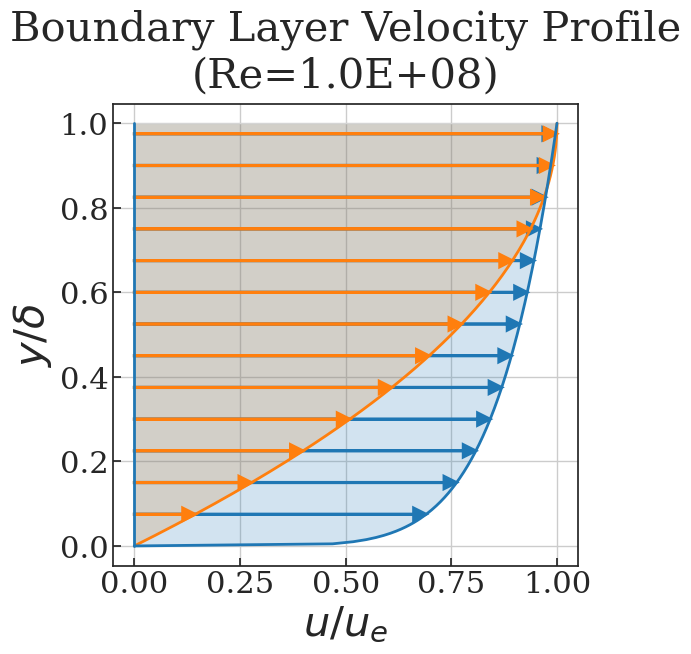

In [114]:
####################################
#PROBLEM 1A: PLOT FLAT PLATE BOUNDARY LAYER VELOCITY PROFILE
#Start Figure (figszie sets aspect ratio of plot)
plt.figure(figsize=(6,6))
plt.title('Boundary Layer Velocity Profile\n(Re={:1.1E})'.format(Re)) 
plt.xlabel("$u/u_e$") #Label x axis (dollar signs are for number formatting using LaTeX)
plt.ylabel("$y / \\delta$") #Label y axis
line = 2 #linewidth


#plot velocity profile (laminar)
plt.plot(unon_L, ynon, color=colors[1], linewidth=line)

#plot velocity profile (turbulent)
plt.plot(unon_T, ynon, color=colors[0], linewidth=line)
#plot u/ue as vertical line for reference
vertlinex = np.zeros(len(ynon)) #yaxis

plt.plot(vertlinex, ynon, color=colors[0], linewidth=line) #plot zero-velocity line
#Fill between two lines
plt.fill_betweenx(ynon, vertlinex, unon_L, facecolor=colors[1], alpha=0.2) #fill in plot

#Fill between two lines
plt.fill_betweenx(ynon, vertlinex, unon_T, facecolor=colors[0], alpha=0.2) #fill in plot
#Plot arrows between two lines:
wd, ln = 0.03, 0.03 #arrow head dimensions

for i in range(0, len(ynon), 15):
    if abs(unon_T[i]) < ln:
        plt.plot([0, unon_T[i]], [ynon[i], ynon[i]], color=colors[0],linewidth=line)
    else:
        plt.arrow(0, ynon[i], unon_T[i]-ln, 0, head_width=wd, head_length=ln, fc=colors[0], ec=colors[0], linewidth=line)


for i in range(0, len(ynon), 15):
    if abs(unon_L[i]) < ln:
        plt.plot([0, unon_L[i]], [ynon[i], ynon[i]], color=colors[1],linewidth=line)
    else:
        plt.arrow(0, ynon[i], unon_L[i]-ln, 0, head_width=wd, head_length=ln, fc=colors[1], ec=colors[1], linewidth=line)

plt.axis([min(unon_T), max(unon_T), min(ynon), max(ynon)]) #limit plot bounds
plt.axis('equal') #Force equal scales on both axes ("apples to apples")

# In order to show your created plot whether in a Jupyter notebook or in a python script, you need to use plt.show()
plt.show()

#Save Figure. File extension (i.e. '.png', '.pdf') will set filetype
# plt.savefig('{}/pj0_1_BLVelProfile.png'.format(savedir), bbox_inches='tight')



**Figure 1** - Horizontal velocity profile at x = 300 f t aft of the nose on a 747 fuselage. Velocity
variation along a vertical line is shown to increase exponentially from zero at the fuselage wall. For good measure, you should add a legend to your plots to be clear what is being shown.

**1.2 Boundary Layer Thickness**
Now that we have a concept of the flow behavior inside of the boundary layer, we can use this information to determine other global properties about the boundary layer. For this project, we will determine the displacement thickness $\delta^{*}$ ⇤ at the aftmost fuselage location, or the amount an external streamline is displaced by the boundary layer at this x-location.

Non-dimensional displacement thickness $\frac{\delta^{*}}{\delta}$ , which is non-dimensionalized by the boundary
layer height $\delta$ at the same x-location, can be determined from the following equation:

**Displacement Thickness**
$$\int_{0}^{1} (1 - \frac{u}{u_{e}})d\frac{y}{\delta} $$

In this equation, we recognize the $\frac{u}{u_{e}}$ term as the boundary layer velocity profile we just calculated in Part 1.1. Thus, we can integrate this distribution to determine the non-dimentional displacement thickness anywhere along the turbulent boundary layer.

However, if we are interested in the physical amount of streamline displacement at the end
of the fuselage, we will need to calculate the actual boundary layer thickness $\delta$ at this x-location,
which can be determined according to the flat plate turbulent boundary layer thickness equation
below:

**Turbulent Boundary Layer Thickness for a Flat Plate:**
$$ \delta(x) = \frac{ 0.16 x}{ (Re_x)^{ \tfrac{1}{7} } }$$

Implementing these equations, we can calculate specific values of $\frac{\delta^{*}}{\delta}$ and $\delta$ at the aft-fuselage location and re-deimensionalize:



In [115]:
###################################
#PROBLEM 1.2: CALCULATE BL DISPLACEMENT THICKNESS
#non-dim. displacement thickness
delta_star_non = np.trapz(1 - unon, ynon) #integrate vel. profile according to eqn above
#dimensional boundary layer thicknes at aft [ft]
delta = L * 0.16 / (Re ** (1 / 7)) #Blausius turbulent flat plate BL thickness eqn
#re-dimensionalize disp. thickness
delta_star = delta_star_non * delta
print('|------------------------------------------------------------------|')
print('|Displacement Thickness: {} in (Re={:1.1E}, L={})|'.format(delta_star*12, Re, L) )
print('|------------------------------------------------------------------|')
print('BL Thickness: {} in'.format(delta*12) )



NameError: name 'unon' is not defined

Thus we find that at the furthest aft fuselage location: 

$$\delta^{*} = 5.22 in $$

meaning that a potential flow streamline will be displaced 5.2 inches from the fuselage surface at this location.



### Problem 2 Airfoil Plotting and Line Integrals

# 2.1 Airfoil Plotting

Here, we are going to practice our plotting skills with three different airfoil geometries. First we must load the data from the individual geometries from text files. You will have to download the files from the selig website mentioned in the problem statement. When visiting the selig website, choose an airfoil, click on the dat file and right click to save as. You can save as a .dat or a .txt file. 

We'll be using loadtxt method as a part of numpy to load this data. We start by designating a filename that we want to use

In [26]:
filename = "naca2412.txt"

# two columns of data, requires two variables
x12, z12 = np.loadtxt(filename, skiprows = 1, unpack = True)

filename = "naca23012.txt"
# two columns of data, requires two variables
xn12, zn12 = np.loadtxt(filename, skiprows = 1, unpack = True)

filename = "goe611.txt"
# two columns of data, requires two variables
xg611, zg611 = np.loadtxt(filename, skiprows = 2, unpack = True)

# next, we just plot this data
#PLOT ALL AIRFOILS
#Start Figure (figsize sets aspect ratio, make it skinny for an airfoil)
plt.figure(figsize=(8,4))
plt.title('Airfoil Geometries') #Set title of figure
plt.xlabel("x/c") #Label x axis (non-dimensional x)
plt.ylabel("z/c") #Label y axis (non-dimensional z)
#Plot Airfoil Data
plt.plot(x12, z12, label="naca 2412", color='black', linestyle="-", linewidth=2, markersize=8)
plt.plot(xn12, zn12, label="naca 23012", color='red', linestyle="-.", linewidth=2, markersize=4)
plt.plot(xg611, zg611, label="goe611", color='blue', linestyle=":", linewidth=3, markersize=2)
plt.grid(True) #Plot a grid
#Force Axis to have equal scale (VERY important for geometry plots)
plt.axis('equal') #************************************************************
plt.xlim([0, 1]) #Lock x-axis to airfoil
#Plot Legend located in 'best' space
plt.legend(loc='best')

FileNotFoundError: naca2412.txt not found.

### Problem 3 - Airfoil Surface Pressure and Numeric Differentiation

# 3.1 - Plot Surface Pressure Distribution

We are provided with the surface pressure distribution for a NACA 2412 airfoil at angle of attack $\alpha$ = $6^{o}$.  Let's see what this pressure distribution looks like by loading the csv file and plotting it.

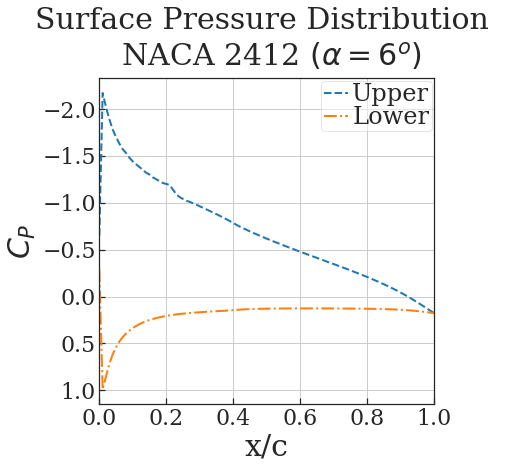

In [35]:
#LOAD NACA 2412 SURFACE PRESSURE DATA
#'naca2412_SurfPress_a6.csv' is a text file with three columns:
#x/c, lower surface Cp, and upper surface Cp
#each column is separated by commas, so we need the " delimiter=',' " option
#'unpack' option gives the values for each column to its own variable
#'skiprows=1' skips the first title row that does not contain actual data
#NOTE: you may need to adjust number of rows to skip, depending on the file

filename = 'naca2412_SurfPress_a6.csv'
x, Cpl, Cpu = np.loadtxt(filename, skiprows=1, unpack=True, delimiter=',')
plt.figure(figsize=(6,6))
plt.title('Surface Pressure Distribution \n NACA 2412 $(\\alpha=6^o)$')
plt.xlabel("x/c") #Label x axis (non-dimensional x)
plt.ylabel("$C_P$") #Label y axis Pressure coefficient
plt.gca().invert_yaxis() #MUST EITHER PLOT NEGATIVE CP OR REVERSE Y AXIS*******
#Plot Airfoil Data
plt.plot(x, Cpu, label='Upper', linewidth=2, linestyle='--')
plt.plot(x, Cpl, label='Lower', linewidth=2, linestyle='-.')
plt.grid(True) #Plot a grid
plt.xlim([0, 1]) #Lock x-axis to airfoil
plt.legend(loc='best') #Legend

Notice that the vertical axis is REVERSED (it goes from positive to negative). Aerodynamicists
do this to make the plot more intuitive: now you can see that there is a negative pressure coefficient
distribution on the upper surface and a positive pressure coefficient distribution on the bottom.
Thus, with suction on the top and pressure on the bottom, the resultant force would be in the
vertical direction, creating lift.

# Part 3.2 - Calculate Surface Pressure Gradient Using Numerical Differentiation
To calculate the pressure gradient from the data above, we simply take a first order, forward
difference with respect to the x direction (notice the pressure gradient vector’s length is one less
than the length of the pressure vector due to the nature of finite differencing):

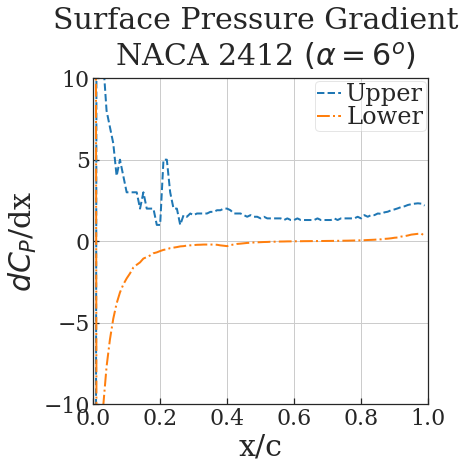

In [36]:
dCpudx = np.zeros(len(Cpu) - 1) #forward difference so one less point
dCpldx = np.zeros(len(Cpl) - 1)
for i in range(len(dCpudx)):
    dCpudx[i] = (Cpu[i+1] - Cpu[i]) / (x[i+1] - x[i]) #slope equation
    dCpldx[i] = (Cpl[i+1] - Cpl[i]) / (x[i+1] - x[i])
#Plot Pressure Gradient
plt.figure(figsize=(6,6))
plt.title('Surface Pressure Gradient \n NACA 2412 $(\\alpha=6^o)$')
plt.xlabel("x/c") #Label x axis (non-dimensional x)
plt.ylabel("$dC_P$/dx") #Label y axis Pressure coefficient
#Plot Airfoil Data
plt.plot(x[:-1], dCpudx, label='Upper', linewidth=2, linestyle='--')
plt.plot(x[:-1], dCpldx, label='Lower', linewidth=2, linestyle='-.')
plt.grid(True) #Plot a grid
plt.xlim([0, 1]) #Lock x-axis to airfoil
plt.ylim([-10, 10]) #Limit bounds to see smaller results
plt.legend(loc='best') #Legend



Here we can see the most significant changes in pressure occur at the leading edge, with an-
other obvious spike at the upper surface boundary layer transition location.

### Problem 4 - Linear Algebra

Next, we are asked to tackle some linear algebra using Python. This specific example is not
founded in aerodynamics, but there are many applications of this kind of math in the field.
Here, we set up our system of equations as various vectors and matrices, then solve them using
Numpy’s built-in functions

In [37]:
####################################
#PROBLEM 4: SOLVE LINEAR SYSTEM OF EQUATIONS
#VARIABLE COEFFICIENTS MATRIX (A)
A = np.array([
[1, 2, 3, 4],
[3, 2, -2, 3],
[0, 1, 1, 0],
[2, 1, 1, -2]
])
b = np.array([12, 10, -1, -5])
soln = np.linalg.solve(A, b)
print('\nSolving:')
print('A =', A)
print('b =', b)
print('Results in:')
for var, val in zip('wxyz', soln): #loop through letters in string and list
    print('{} = {:1.6f}'.format(var, val))


Solving:
A = [[ 1  2  3  4]
 [ 3  2 -2  3]
 [ 0  1  1  0]
 [ 2  1  1 -2]]
b = [12 10 -1 -5]
Results in:
w = 1.153846
x = -1.230769
y = 0.230769
z = 3.153846


# Problem 5 - Lift Curves and Linear Interpolation

Problem 5 will be left to you as an exercise to complete on your own. Use the above solutions to determine how best to solve all parts of the problem. See the sections below for short explanations on how to approach the problems. Reach out to your TAs if you require further assistance.

### Problem 5.1 Lift Curves
> For this problem, we are creating a lift curve. Pick two airfoils from airfoiltools.com, one symmetric and one cambered. Plot both of these airfoils using the same methods you did in Problem 2.  
> On airfoiltools.com, when you navigate to the airfoils page, multiple lift curves ($C_{l}$ vs $\alpha$) and multiple drag polars ($C_{d}$ vs $C_{l}$) will be available. Choose one (based on the Reynolds number) and save the data. You should use he same reynolds number (or close) for both your symmetric and cambered airfoil. Once you have the data for both, plot them using the methods from Problem 2 or Problem 3. 
> Finally, comment on the differences between both plots.

### Problem 5.2 Linear Interpolation. 
> For this problem, using numpy.interp, (the interpolation function inside of numpy), you will determine the coefficient of lift $C_{l}$ at two discrete points for each airfoil (4 interpolation functions total). You can find the documentation on how to use np.interp(), here: 
https://numpy.org/doc/stable/reference/generated/numpy.interp.html

### Problem 5.3 
> Using the equations provided in the Project Statement, calculate the maximum lift force. You'll use the data you acquired in 5.1 and determine the maximum value of $C_{l}$ in order to calculate max L. 
